In [1]:
# from random import *
# import time
# import math
# import sys
# import matplotlib.pyplot as plt
# import graphviz

#!{sys.executable} -m pip install graphviz

from helpers import *

In [ ]:
n=100
cat = [1]*(n+1)

for i in range(1,n+1):
    cat[i] = sum(cat[k]*cat[i-k-1])

In [4]:
n = 2000
t_start = time.time()

catalan = [1] # on peut aussi utliser de la memoization avec @functools.cache
for i in range(1,n+1):
    catalan.append(sum(catalan[j] * catalan[i-j-1] for j in range(i)))

print("{1:.2f} sec. to compute {0} catalan numbers : ".format(n, time.time() - t_start))
print(catalan[:10])

3.76 sec. to compute 2000 catalan numbers : 
[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]


In [54]:
def uniform_cut(n) : #choisir $i$ avec probabilité $p_i=c_ic_{n-i-1}/{c_n}$ 
    u = random.random()
    i, s = 0, catalan[0] * catalan[n-1] / catalan[n]
    while u > s :
        i += 1
        s += catalan[i] * catalan[n-i-1] / catalan[n]
    return i

def random_binary_tree_rec(n):
    if n == 0:
        return []
    i = uniform_cut(n) # $O(n)$
    return ['z', random_binary_tree_rec(i), random_binary_tree_rec(n-i-1)]

def random_binary_tree_rec_labelled(n):
    p = random_permutation(2*n+1)
    def aux(t):
        if t==[]:
            return [p.pop()]
        return [p.pop()]+[aux(tt) for tt in t[1:]]
    return aux(random_binary_tree_rec(n))

def random_binary_tree_height(n):
    if n == 0:
        return 0
    i = uniform_cut(n) # $O(n)$
    return 1 + max(random_binary_tree_height(i), random_binary_tree_height(n-i-1))

In [55]:
a = random_binary_tree_rec(10)
print(a)

['z', ['z', [], ['z', ['z', ['z', ['z', [], ['z', [], ['z', [], []]]], []], ['z', [], []]], []]], ['z', [], []]]


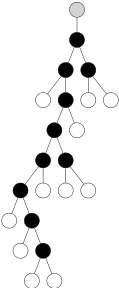

In [56]:
draw_tree_unlabelled(a,4,4)

In [76]:
a = random_binary_tree_rec(2000)
#print(a)

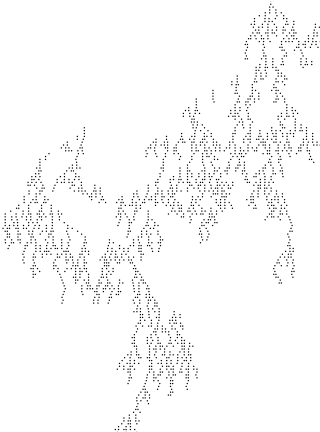

In [77]:
draw_tree_unlabelled(a,6,6)

In [57]:
print(random_binary_tree_height(100))

34


In [58]:
a = random_binary_tree_rec_labelled(10)
print(a)

[10, [21, [6, [11, [4, [3], [15, [14], [5, [17], [2, [13], [16]]]]], [20]], [8]], [9, [19, [18], [1]], [12]]], [7]]


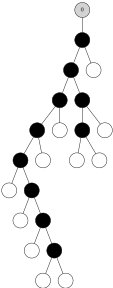

In [59]:
draw_tree_labelled(a,4,4)

1 40 79 118 157 196 235 274 313 352 391 430 469 508 547 586 625 664 703 742 781 820 859 898 937 976 1015 1054 1093 1132 1171 1210 1249 1288 1327 1366 1405 1444 1483 1522 1561 1600 1639 1678 1717 1756 1795 1834 1873 1912 1951 1990 

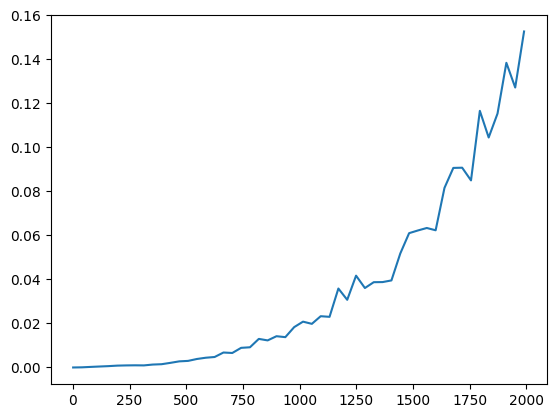

In [65]:
plot_time(random_binary_tree_height, 2000, 50, 20)

In [10]:
count_occurences(lambda : random_binary_tree_rec(3), 10000000)

nb: 5
['z', ['z', [], ['z', [], []]], []] 19.99
['z', ['z', ['z', [], []], []], []] 20.02
['z', [], ['z', ['z', [], []], []]] 19.99
['z', [], ['z', [], ['z', [], []]]] 20.00
['z', ['z', [], []], ['z', [], []]] 19.99


1 40 79 118 157 196 235 274 313 352 391 430 469 508 547 586 625 664 703 742 781 820 859 898 937 976 1015 1054 1093 1132 1171 1210 1249 1288 1327 1366 1405 1444 1483 1522 1561 1600 1639 1678 1717 1756 1795 1834 1873 1912 1951 1990 

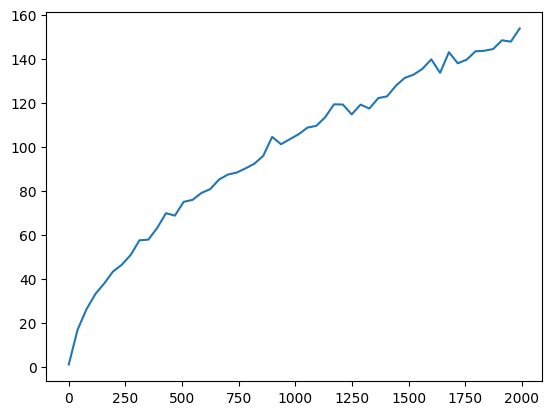

In [11]:
plot_values(random_binary_tree_height, 2000, 50, 100)

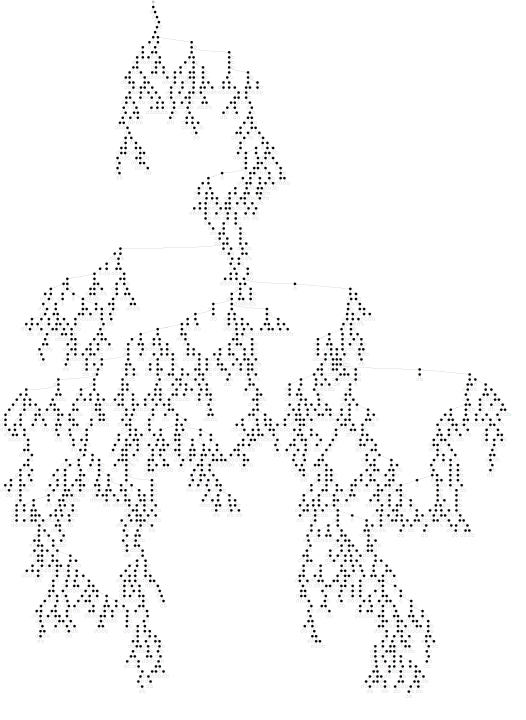

In [12]:
a = random_binary_tree_rec(1999)
draw_tree_unlabelled(a,10,10)

In [41]:
def uniform_cut2(n) : # choisir $i$ avec proba $p_i=c_ic_{n-i-1}/{c_n}$, en boustrophédon :)
    u = random.random()
    i, s = 0, catalan[0] * catalan[n-1] / catalan[n]
    while True :
        if u <= s :
            return i
        if u > 1-s :
            return n-i-1
        i += 1
        s += catalan[i] * catalan[n-i-1] / catalan[n]

def random_binary_tree_rec2(n):
    if n == 0:
        return []
    i = uniform_cut2(n) # $O(n)$
    return ['z', random_binary_tree_rec2(i), random_binary_tree_rec2(n-i-1)]

def random_binary_tree_height2(n):
    if n == 0:
        return 0
    i = uniform_cut2(n) # $O(n)$
    return 1 + max(random_binary_tree_height2(i), random_binary_tree_height2(n-i-1))

In [68]:
c = count_occurences(lambda : random_binary_tree_rec2(3), 10000000)

nb: 5
['z', [], ['z', ['z', [], []], []]] 20.01
['z', ['z', [], []], ['z', [], []]] 20.00
['z', [], ['z', [], ['z', [], []]]] 19.98
['z', ['z', [], ['z', [], []]], []] 20.00
['z', ['z', ['z', [], []], []], []] 20.01


1 40 79 118 157 196 235 274 313 352 391 430 469 508 547 586 625 664 703 742 781 820 859 898 937 976 1015 1054 1093 1132 1171 1210 1249 1288 1327 1366 1405 1444 1483 1522 1561 1600 1639 1678 1717 1756 1795 1834 1873 1912 1951 1990 

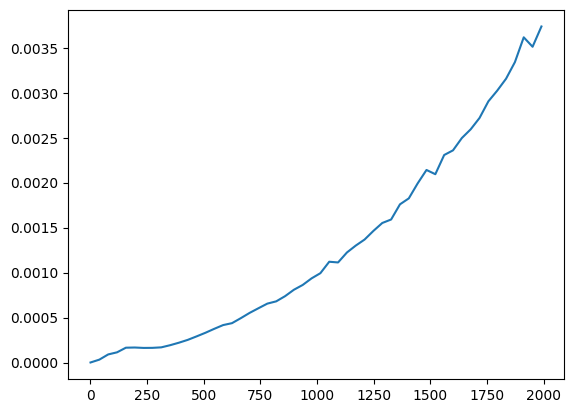

In [66]:
plot_time(random_binary_tree_height2, 2000, 50, 100)

In [78]:
a = random_binary_tree_rec2(2000)
#print(a)

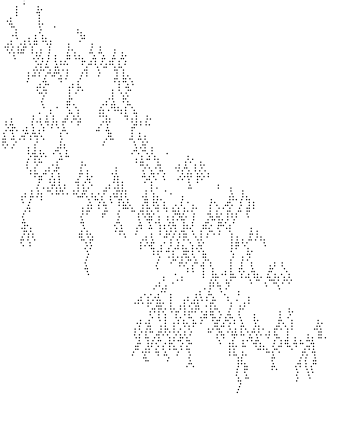

In [79]:
draw_tree_unlabelled(a,6,6)